# <font color='red'> Spoken Digit Recognition</font>


In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>Instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. Please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>



In [1]:
#!pip install librosa

In [2]:
import numpy as np
import pandas as pd
import librosa
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
##if you need any imports you can do that here. 

We shared recordings.zip, please unzip those. 

In [3]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"

all_files = os.listdir(r"recordings")
len(all_files)

2000

<font size=4>Grader function 1 </font>

In [4]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

## Exploring the sound dataset

In [5]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

In [6]:
all_files[:5]

['7_jackson_7.wav',
 '8_yweweler_23.wav',
 '1_yweweler_1.wav',
 '0_yweweler_3.wav',
 '6_jackson_44.wav']

In [7]:
all_files[1][0]

'8'

In [8]:
df_audio = pd.DataFrame()

def dataframe(root_dir):
    path = []
    label = []
    for i in range(len(all_files)):
        path.append(root_dir+'/'+all_files[i])
        label.append(all_files[i][0])
        
    df_audio['path'] = path
    df_audio['label'] = label
        
    return df_audio


In [9]:
root_dir = 'recordings'
df_audio = dataframe(root_dir)
df_audio.head()

,path,label
0,recordings/7_jackson_7.wav,7
1,recordings/8_yweweler_23.wav,8
2,recordings/1_yweweler_1.wav,1
3,recordings/0_yweweler_3.wav,0
4,recordings/6_jackson_44.wav,6


In [10]:
df_audio.shape

(2000, 2)

## Creating dataframe

In [11]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0


In [12]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [13]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [14]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [15]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%


from sklearn.model_selection import train_test_split

X = df_audio['path']
y = df_audio['label']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=45,stratify=y )

In [16]:
print("train shape: ", X_train.shape, y_train.shape)
print("test shape:  ", X_test.shape, y_test.shape)

train shape:  (1400,) (1400,)
test shape:   (600,) (600,)


<font size=4>Grader function 3 </font>

In [17]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [18]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [19]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train

In [20]:
X_tr = X_train.values

train_raw_data = []
train_duration = []

for i in tqdm(range(len(X_tr))):
    samples, duration = load_wav(X_tr[i])
    train_raw_data.append(samples)
    train_duration.append(duration)
    
X_train_processed = pd.DataFrame()
X_train_processed['raw_data'] = train_raw_data
X_train_processed['duration'] = train_duration
    

100%|██████████████████████████████████████| 1400/1400 [00:13<00:00, 106.08it/s]


In [21]:
X_train_processed.head()

,raw_data,duration
0,"[0.00087281835, 0.0004117749, -2.936911e-05, -...",0.327755
1,"[-0.00038002394, -0.00019715699, 0.00010046658...",0.427029
2,"[-0.0002015104, -8.0844686e-05, -3.0828054e-05...",0.222630
3,"[0.0012677191, 0.001223072, 0.0006890931, -0.0...",0.477143
4,"[-0.007789636, -0.009217891, -0.008847748, -0....",0.426168


In [22]:
X_te = X_test.values

test_raw_data = []
test_duration = []

for i in tqdm(range(len(X_te))):
    samples, duration = load_wav(X_te[i])
    test_raw_data.append(samples)
    test_duration.append(duration)
    
X_test_processed = pd.DataFrame()
X_test_processed['raw_data'] = test_raw_data
X_test_processed['duration'] = test_duration
    

100%|████████████████████████████████████████| 600/600 [00:05<00:00, 113.31it/s]


In [23]:
X_test_processed.head()

,raw_data,duration
0,"[-0.00018607912, -0.0002530324, -0.00028846323...",0.259138
1,"[-0.02292528, -0.03088903, -0.033623796, -0.03...",0.395011
2,"[-0.030367538, -0.026899911, -0.013228855, 0.0...",0.309887
3,"[0.00011964719, -0.0019205003, -0.0052836672, ...",0.470385
4,"[0.00023663024, 0.00028101765, 0.00023928868, ...",0.513152


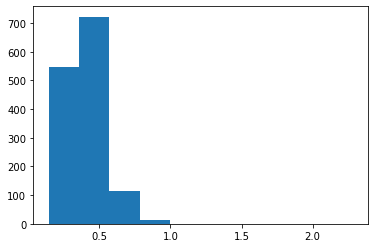

In [24]:
#plot the histogram of the duration for trian

fig, ax = plt.subplots()
ax.hist(X_train_processed['duration'])
 
# Show plot
plt.show()

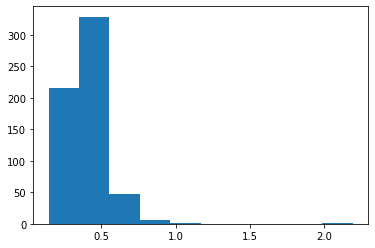

In [25]:
#plot the histogram of the duration for test

fig, ax = plt.subplots()
ax.hist(X_test_processed['duration'])
 
# Show plot
plt.show()

In [26]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 

for i in range(0,100,10):
    var = X_train_processed['duration'].values
    var = np.sort(var,axis = None)
    print("{} th percentile is {}".format(int(i),var[int(len(var)*(float(i)/100))]))
print("100 th percentile is ",var[-1])

0 th percentile is 0.1435374149659864
10 th percentile is 0.2597732426303855
20 th percentile is 0.3020408163265306
30 th percentile is 0.3322902494331066
40 th percentile is 0.35950113378684806
50 th percentile is 0.389750566893424
60 th percentile is 0.4164172335600907
70 th percentile is 0.44825396825396824
80 th percentile is 0.48462585034013606
90 th percentile is 0.5599092970521542
100 th percentile is  2.282766439909297


In [27]:
##print 90 to 100 percentile values with step size of 1. 

for i in range(90,100,1):
    var = X_train_processed['duration'].values
    var = np.sort(var,axis = None)
    print("{} th percentile is {}".format(int(i),var[int(len(var)*(float(i)/100))]))
print("100 th percentile is ",var[-1])

90 th percentile is 0.5599092970521542
91 th percentile is 0.5759183673469388
92 th percentile is 0.5851700680272108
93 th percentile is 0.6078911564625851
94 th percentile is 0.6210430839002268
95 th percentile is 0.6346485260770975
96 th percentile is 0.648390022675737
97 th percentile is 0.6742857142857143
98 th percentile is 0.7120181405895691
99 th percentile is 0.8067573696145125
100 th percentile is  2.282766439909297


<font size=4>Grader function 4 </font>

In [28]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [29]:
max_length  = 17640

In [30]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

In [31]:
print(len(X_train_processed['raw_data'][0]))
print(X_train_processed['duration'][0])

7227
0.3277551020408163


In [32]:
# https://stackoverflow.com/questions/30475558/padding-or-truncating-a-python-list

def trp(l, n):
    """ Truncate or pad a list """
    r = list(l[:n])
    if(len(r) < n):
        r.extend([0] * (n - len(r)))
    return r

X_train_pad_seq = []
X_train_mask = []
X_test_pad_seq = []
X_test_mask = []

for i in range(len(X_train_processed)):
    pad_seq = trp(np.array(X_train_processed['raw_data'][i]), max_length)
    X_train_pad_seq.append(pad_seq)
    
    
for i in range(len(X_test_processed)):
    pad_seq = trp(np.array(X_test_processed['raw_data'][i]), max_length)
    X_test_pad_seq.append(pad_seq)
    


X_train_pad_seq = np.array(X_train_pad_seq)
X_test_pad_seq = np.array(X_test_pad_seq)

X_train_mask = np.where(X_train_pad_seq != 0, 1, 0)
X_train_mask = X_train_mask.astype(bool)
X_test_mask = np.where(X_test_pad_seq != 0, 1, 0)
X_test_mask = X_test_mask.astype(bool)

print(X_train_pad_seq.shape)
print(X_test_pad_seq.shape)

print(X_train_mask.shape)
print(X_test_mask.shape)


(1400, 17640)
(600, 17640)
(1400, 17640)
(600, 17640)


<font size=4>Grader function 5 </font>

In [33]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [44]:
%load_ext tensorboard

In [45]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [36]:
print(type(y_train[4]), type(y_test[17]))

<class 'str'> <class 'str'>


In [37]:
y_train_int.value_counts()

6    140
1    140
5    140
0    140
2    140
8    140
9    140
7    140
3    140
4    140
Name: label, dtype: int64

In [38]:
y_test_int.value_counts()

3    60
5    60
2    60
6    60
9    60
0    60
1    60
4    60
8    60
7    60
Name: label, dtype: int64

In [39]:
from tensorflow.keras.layers import Input, LSTM, Dense, concatenate, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score
from time import time
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler
from tensorflow.python.keras.callbacks import TensorBoard

2022-09-03 10:30:00.477107: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [41]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool


tf.keras.backend.clear_session()

seq_inp_layer = Input(shape=(17640,1), dtype='float32',name='seq_inp')
mask_inp_layer = Input(shape=(17640), dtype='bool',name='mask_inp')
lstm = LSTM(64)(seq_inp_layer,mask=mask_inp_layer)
fc1 = Dense(64,activation='relu',kernel_initializer='he_uniform')(lstm)
dp1 = Dropout(0.2)(fc1)
out_layer = Dense(10,activation='softmax')(dp1)

model1 = Model(inputs=[seq_inp_layer,mask_inp_layer],outputs=out_layer)
model1.summary()

2022-09-02 10:06:32.360235: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-09-02 10:06:32.360304: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu22): /proc/driver/nvidia/version does not exist
2022-09-02 10:06:32.372677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 seq_inp (InputLayer)           [(None, 17640, 1)]   0           []                               
                                                                                                  
 mask_inp (InputLayer)          [(None, 17640)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 64)           16896       ['seq_inp[0][0]',                
                                                                  'mask_inp[0][0]']               
                                                                                                  
 dense (Dense)                  (None, 64)           4160        ['lstm[0][0]']               

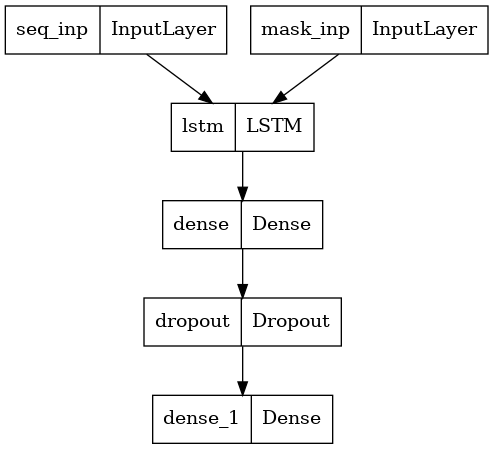

In [42]:
tf.keras.utils.plot_model(model1, to_file='model1/model1.png')

In [43]:
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.x_test = validation_data[0]
        self.y_test = validation_data[1]
        
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.x_test)))
        val_label = np.argmax(val_predict, axis = 1)
        val_targ = self.y_test
        val_f1 = f1_score(val_targ, val_label, average='micro')
        print("val_F1_score: ", val_f1)
        
metrics = Metrics(validation_data=([X_test_pad_seq,X_test_mask], y_test_int))

In [44]:
tensorboard1 = TensorBoard(log_dir='model1/model1_logs'.format(time()), histogram_freq=1, write_graph=True,)

2022-09-02 10:06:34.157948: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-02 10:06:34.158017: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-02 10:06:34.191964: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.


In [45]:
callbacks = [
    ModelCheckpoint(filepath='./model1/best_model_1.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_accuracy', verbose = 1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 1, mode = 'max', verbose = 1),
    tf.keras.callbacks.CSVLogger('./model1/history.csv'),
]


model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.06,decay = 1e-4),
              metrics=['accuracy'])


In [46]:
#train your model
model1.fit([X_train_pad_seq,X_train_mask],y_train_int, batch_size=64, epochs=3, 
           validation_data=([X_test_pad_seq,X_test_mask], y_test_int), callbacks=[callbacks, metrics, tensorboard1],
          )

Epoch 1/3
 1/22 [>.............................] - ETA: 3:40 - loss: 2.3026 - accuracy: 0.0938

2022-09-02 10:06:45.713180: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-02 10:06:45.713235: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-02 10:06:56.415031: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-02 10:07:05.657513: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-09-02 10:07:13.363033: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: model1/model1_logs/train/plugins/profile/2022_09_02_10_07_06

2022-09-02 10:07:16.463181: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to model1/model1_logs/train/plugins/profile/2022_09_02_10_07_06/ubuntu22.trace.json.gz
2022-09-02 10:07:21.106844: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: model1/model1_logs/train/plugins/profile/2022_09_02_10

22/22 [==============================] - ETA: 0s - loss: 2.3428 - accuracy: 0.1000 
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to ./model1/best_model_1.h5
19/19 [==============================] - 30s 2s/step
val_F1_score:  0.10000000000000002
22/22 [==============================] - 294s 13s/step - loss: 2.3428 - accuracy: 0.1000 - val_loss: 2.3091 - val_accuracy: 0.1000 - lr: 0.0600
Epoch 2/3
22/22 [==============================] - ETA: 0s - loss: 2.3191 - accuracy: 0.0921
Epoch 2: val_accuracy did not improve from 0.10000

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00599999986588955.
19/19 [==============================] - 27s 1s/step
val_F1_score:  0.10000000000000002
22/22 [==============================] - 252s 12s/step - loss: 2.3191 - accuracy: 0.0921 - val_loss: 2.3069 - val_accuracy: 0.1000 - lr: 0.0600
Epoch 3/3
22/22 [==============================] - ETA: 0s - loss: 2.3068 - accuracy: 0.1000
Epoch 3: val_accuracy did not improve from 0.1

> <b>At end of 3 epoch val_F1_score 0.10</b>

In [48]:
%tensorboard --logdir model1/model1_logs

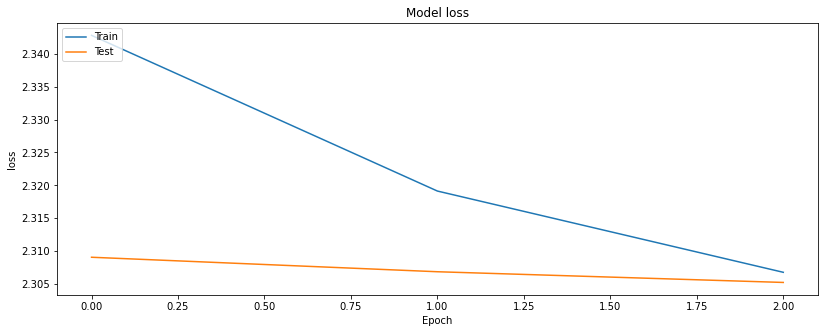

In [47]:
# Plot training & validation iou_score values
import matplotlib.pyplot as plt
his = pd.read_csv('model1/history.csv')

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

> <b> From the above plot we can ensure that model is not overfitted</b>

### 2. Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [34]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [35]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)


X_train_spectrogram = np.array(convert_to_spectrogram(X_train_pad_seq))
X_test_spectrogram = np.array(convert_to_spectrogram(X_test_pad_seq))

In [36]:
print(X_train_spectrogram.shape)
print(X_test_spectrogram.shape)

(1400, 64, 35)
(600, 64, 35)


<font size=4>Grader function 6 </font>

In [37]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True


Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [92]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above

tf.keras.backend.clear_session()

input_layer = Input(shape=(64, 35), name="X_train_pad_seq_input", dtype='float32')

lstm_output = LSTM(120, return_sequences=True, kernel_initializer=tf.keras.initializers.HeUniform())(input_layer)

global_pooling = GlobalAveragePooling1D()(lstm_output)

fc1 = Dense(64, kernel_initializer=tf.keras.initializers.HeUniform())(global_pooling)

gelu_1 = tf.keras.layers.PReLU()(fc1)

droup_1 = Dropout(0.2)(gelu_1)

output = Dense(10,activation='softmax')(droup_1)

model2 = Model(inputs = [input_layer], outputs = output) 

model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 X_train_pad_seq_input (Inpu  [(None, 64, 35)]         0         
 tLayer)                                                         
                                                                 
 lstm (LSTM)                 (None, 64, 120)           74880     
                                                                 
 global_average_pooling1d (G  (None, 120)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                7744      
                                                                 
 p_re_lu (PReLU)             (None, 64)                64        
                                                                 
 dropout (Dropout)           (None, 64)                0     

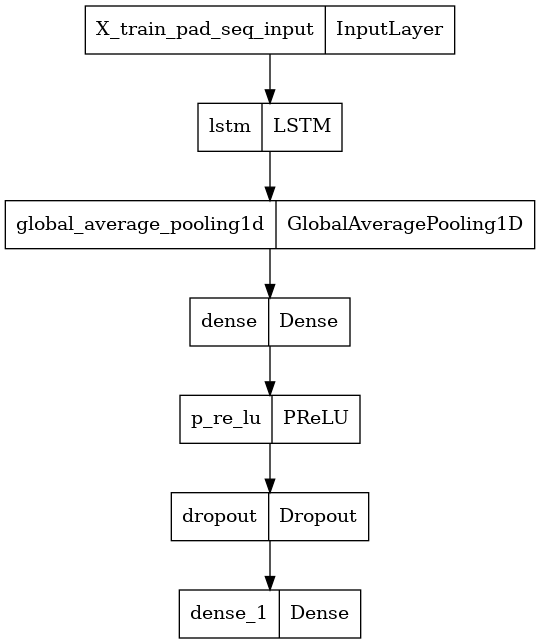

In [73]:
tf.keras.utils.plot_model(model2, to_file='model2/model2.png')

In [42]:
X_test_spectrogram.shape

(600, 64, 35)

In [46]:
y_test_int.shape

(600,)

In [93]:
THRESHOLD = 0.8
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.x_test = validation_data[0]
        self.y_test = validation_data[1]
        
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.x_test)))
        val_label = np.argmax(val_predict, axis = 1)
        val_targ = self.y_test
        val_f1 = f1_score(val_targ, val_label, average='micro')
        print("val_F1_score: ", val_f1)
        
        
        if(val_f1 > 0.80):
            print("\nReached %2.2f%% val_F1_score, so stopping training!!" %(THRESHOLD))
            self.model.stop_training = True
        
        
metrics = Metrics(validation_data=([X_test_spectrogram], y_test_int))

In [94]:
tensorboard2 = TensorBoard(log_dir='model2/model2_logs'.format(time()), histogram_freq=1, write_graph=True,)

2022-09-03 12:40:39.048308: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-03 12:40:39.048330: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-03 12:40:39.048437: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-09-03 12:40:39.048447: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2022-09-03 12:40:39.048452: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-09-03 12:40:39.048457: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1716] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2022-09-03 12:40:39.048600: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-09-03 12:40:39.0

In [95]:
callbacks2 = [
    ModelCheckpoint(filepath='./model2/best_model_2.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_accuracy', verbose = 1),
    #tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 1, mode = 'max', verbose = 1,factor=0.9),
    tf.keras.callbacks.CSVLogger('./model2/history.csv'),
]

#compile model.
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0006),
              metrics=['accuracy'])


In [96]:
#train your model

model2.fit([X_train_spectrogram],y_train_int, batch_size=64, epochs=3000, 
           validation_data=([X_test_spectrogram], y_test_int), callbacks=[callbacks2, metrics, tensorboard2],
          )

Epoch 1/3000
 1/22 [>.............................] - ETA: 30s - loss: 2.4855 - accuracy: 0.1406

2022-09-03 12:41:07.930551: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-03 12:41:07.930584: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-03 12:41:07.930627: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-09-03 12:41:07.930634: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2022-09-03 12:41:07.930643: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-09-03 12:41:07.930647: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1716] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2022-09-03 12:41:08.060668: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-03 12:41

 3/22 [===>..........................] - ETA: 3s - loss: 2.5174 - accuracy: 0.1094

2022-09-03 12:41:08.143810: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: model2/model2_logs/train/plugins/profile/2022_09_03_12_41_08

2022-09-03 12:41:08.173122: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to model2/model2_logs/train/plugins/profile/2022_09_03_12_41_08/AI-iiitg.trace.json.gz
2022-09-03 12:41:08.215991: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: model2/model2_logs/train/plugins/profile/2022_09_03_12_41_08

2022-09-03 12:41:08.220813: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to model2/model2_logs/train/plugins/profile/2022_09_03_12_41_08/AI-iiitg.memory_profile.json.gz
2022-09-03 12:41:08.221435: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: model2/model2_logs/train/plugins/profile/2022_09_03_12_41_08
Dumped tool data for xplane.pb to model

21/22 [===========================>..] - ETA: 0s - loss: 2.4031 - accuracy: 0.0990
Epoch 1: val_accuracy improved from -inf to 0.11667, saving model to ./model2/best_model_2.h5
19/19 [==============================] - 1s 15ms/step
val_F1_score:  0.11666666666666667
22/22 [==============================] - 4s 131ms/step - loss: 2.3996 - accuracy: 0.1000 - val_loss: 2.3009 - val_accuracy: 0.1167
Epoch 2/3000
22/22 [==============================] - ETA: 0s - loss: 2.2978 - accuracy: 0.1164
Epoch 2: val_accuracy improved from 0.11667 to 0.12500, saving model to ./model2/best_model_2.h5
19/19 [==============================] - 0s 15ms/step
val_F1_score:  0.125
22/22 [==============================] - 2s 87ms/step - loss: 2.2978 - accuracy: 0.1164 - val_loss: 2.2635 - val_accuracy: 0.1250
Epoch 3/3000
22/22 [==============================] - ETA: 0s - loss: 2.2479 - accuracy: 0.1593
Epoch 3: val_accuracy improved from 0.12500 to 0.15833, saving model to ./model2/best_model_2.h5
19/19 [=====

> <b>At end of 451 epoch val_F1_score 0.80</b>

In [97]:
%tensorboard --logdir model2/model2_logs

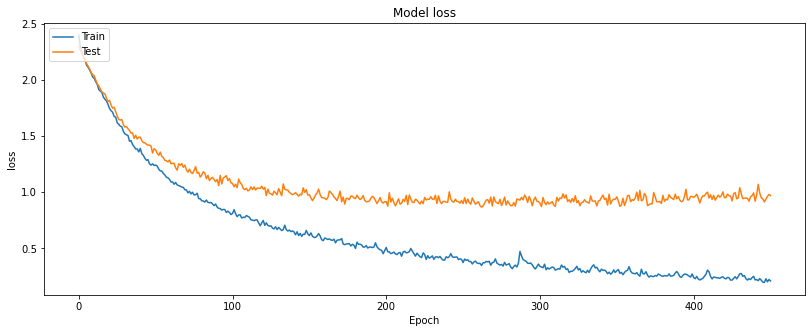

In [98]:
# Plot training & validation iou_score values
import matplotlib.pyplot as plt
his = pd.read_csv('model2/history.csv')

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

> <b> From the above plot we can ensure that model is slightly gets overfit</b>

### 3. Data augmentation with raw features 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [100]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [101]:
df_audio.iloc[0]

path     recordings/3_jackson_1.wav
label                             3
Name: 766, dtype: object

In [102]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [103]:
len(aug_temp)

9

## Follow the steps 

1. Split data 'df_audio' into train and test (80-20 split)

2. We have 2000 data points(1600 train points, 400 test points) 



In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],df_audio['label'],random_state=45,test_size=0.2,stratify=df_audio['label'])

3. Do augmentation only on X_train,pass each point of X_train to generate_augmented_data function.After augmentation we will get 14400 train points. Make sure that you are augmenting the corresponding class labels (y_train) also.
4. Preprocess your X_test using load_wav function.
5. Convert the augmented_train_data and test_data to numpy arrays.
6. Perform padding and masking on augmented_train_data and test_data.
7. After padding define the model similar to model 1 and fit the data

<font color='red'> Note </font> - While fitting your model on the augmented data for model 3 you might face Resource exhaust error. One simple hack to avoid that is save the augmented_train_data,augment_y_train,test_data and y_test to Drive or into your local system. Then restart the runtime so that now you can train your model with full RAM capacity. Upload these files again in the new runtime session perform padding and masking and then fit your model.

In [105]:
X_train

1263     recordings/8_yweweler_4.wav
142     recordings/2_yweweler_42.wav
1954         recordings/7_theo_7.wav
65          recordings/3_theo_46.wav
1531     recordings/9_jackson_32.wav
                    ...             
113          recordings/9_theo_7.wav
1637     recordings/7_jackson_22.wav
1473      recordings/0_jackson_1.wav
617      recordings/3_yweweler_3.wav
1639     recordings/2_nicolas_22.wav
Name: path, Length: 1600, dtype: object

In [106]:
y_train

1263    8
142     2
1954    7
65      3
1531    9
       ..
113     9
1637    7
1473    0
617     3
1639    2
Name: label, Length: 1600, dtype: object

In [107]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [108]:
X_train_aug = []
y_train_aug = []

for i in tqdm(range(len(X_train))):
    temp_path = X_train.iloc[i]
    X_train_aug.append(generate_augmented_data(temp_path))
    
for j in tqdm(range(len(y_train_int))):
    temp_label = y_train_int.iloc[j]
    y_train_aug.append([temp_label]*9)
    
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

X_train_augmented = X_train_aug.flatten()
y_train_augmented = y_train_aug.flatten()

100%|███████████████████████████████████| 1600/1600 [00:00<00:00, 196730.96it/s]


In [52]:
import pickle

# save all your results to disk so that, no need to run all again. 
pickle.dump((X_train_augmented, y_train_augmented),open('model3/augmented.pkl','wb'))

In [24]:
#import pickle
#X_train_augmented, y_train_augmented = pickle.load(open('model3/augmented.pkl', 'rb'))

In [25]:
print(X_train_augmented.shape)
print(y_train_augmented.shape)

(14400,)
(14400,)


In [109]:
print(X_train_augmented[9])
print(y_train_augmented[9])

[ 2.7550347e-04  2.7281698e-04  1.2551129e-04 ... -1.2097165e-04
 -9.4063718e-05 -9.1231283e-05]
2


In [110]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [111]:
X_te = X_test.values

test_raw_data = []
test_duration = []

for i in tqdm(range(len(X_te))):
    samples, duration = load_wav(X_te[i])
    test_raw_data.append(samples)
    test_duration.append(duration)
    
X_test_processed = pd.DataFrame()
X_test_processed['raw_data'] = test_raw_data
X_test_processed['duration'] = test_duration

100%|████████████████████████████████████████| 400/400 [00:02<00:00, 136.74it/s]


In [112]:
X_test_processed.head()

,raw_data,duration
0,"[-2.4109613e-05, 6.209989e-05, 0.0001363404, 0...",0.409388
1,"[-0.009577481, -0.011705862, -0.01152472, -0.0...",0.355782
2,"[-0.00021788295, -0.00023067498, -0.0001956816...",0.326531
3,"[0.009968175, 0.007859625, 0.003288437, -0.000...",0.582902
4,"[-0.0071265, -0.0045903055, -0.0015180755, -0....",0.553651


In [113]:
X_test = X_test_processed['raw_data'].values
X_test.shape

(400,)

In [114]:
max_length  = 17640

In [115]:
len(X_train_augmented[8])

5530

In [116]:
# https://stackoverflow.com/questions/30475558/padding-or-truncating-a-python-list

def trp(l, n):
    """ Truncate or pad a list """
    r = list(l[:n])
    if(len(r) < n):
        r.extend([0] * (n - len(r)))
    return r

X_train_pad_seq = []
X_train_mask = []
X_test_pad_seq = []
X_test_mask = []

for i in tqdm(range(len(X_train_augmented))):
    pad_seq = trp(np.array(X_train_augmented[i]), max_length)
    X_train_pad_seq.append(pad_seq)
    
    
for i in tqdm(range(len(X_test))):
    pad_seq = trp(np.array(X_test[i]), max_length)
    X_test_pad_seq.append(pad_seq)
    


X_train_pad_seq = np.array(X_train_pad_seq)
X_test_pad_seq = np.array(X_test_pad_seq)

X_train_mask = np.where(X_train_pad_seq != 0, 1, 0)
X_train_mask = X_train_mask.astype(bool)
X_test_mask = np.where(X_test_pad_seq != 0, 1, 0)
X_test_mask = X_test_mask.astype(bool)

print(X_train_pad_seq.shape)
print(X_test_pad_seq.shape)

print(X_train_mask.shape)
print(X_test_mask.shape)


100%|████████████████████████████████████████| 400/400 [00:00<00:00, 906.55it/s]


(14400, 17640)
(400, 17640)
(14400, 17640)
(400, 17640)


In [43]:
y_test_int.shape

(400,)

In [34]:
%load_ext tensorboard

In [44]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool


tf.keras.backend.clear_session()

seq_inp_layer = Input(shape=(17640,1), dtype='float32',name='seq_inp')
mask_inp_layer = Input(shape=(17640), dtype='bool',name='mask_inp')
lstm = LSTM(64)(seq_inp_layer,mask=mask_inp_layer)
fc1 = Dense(64,activation='relu',kernel_initializer='he_uniform')(lstm)
dp1 = Dropout(0.2)(fc1)
out_layer = Dense(10,activation='softmax')(dp1)

model3 = Model(inputs=[seq_inp_layer,mask_inp_layer],outputs=out_layer)
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 seq_inp (InputLayer)           [(None, 17640, 1)]   0           []                               
                                                                                                  
 mask_inp (InputLayer)          [(None, 17640)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 64)           16896       ['seq_inp[0][0]',                
                                                                  'mask_inp[0][0]']               
                                                                                                  
 dense (Dense)                  (None, 64)           4160        ['lstm[0][0]']               

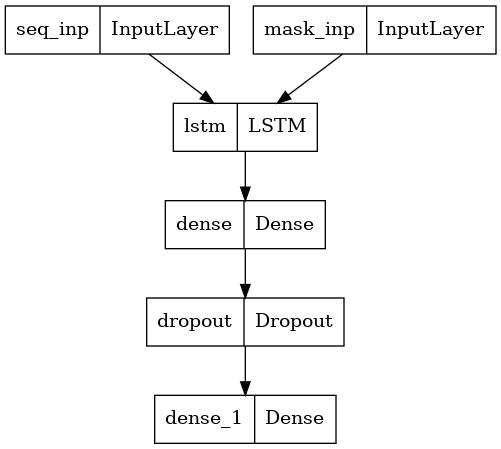

In [46]:
tf.keras.utils.plot_model(model3, to_file='model3/model3.png')

In [50]:
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.x_test = validation_data[0]
        self.y_test = validation_data[1]
        
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.x_test)))
        val_label = np.argmax(val_predict, axis = 1)
        val_targ = self.y_test
        val_f1 = f1_score(val_targ, val_label, average='micro')
        print("val_F1_score: ", val_f1)
        
metrics = Metrics(validation_data=([X_test_pad_seq,X_test_mask], y_test_int))

In [51]:
tensorboard3 = TensorBoard(log_dir='model3/model3_logs'.format(time()), histogram_freq=1, write_graph=True,)

2022-09-02 18:14:59.085720: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-02 18:14:59.085747: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-02 18:14:59.085912: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-09-02 18:14:59.085922: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2022-09-02 18:14:59.085926: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-09-02 18:14:59.085931: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1716] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2022-09-02 18:14:59.086000: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-09-02 18:14:59.0

In [52]:
callbacks3 = [
    ModelCheckpoint(filepath='./model3/best_model_3.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_accuracy', verbose = 1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 1, mode = 'max', verbose = 1),
    tf.keras.callbacks.CSVLogger('./model3/history.csv'),
]


model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0006,decay = 1e-4),
              metrics=['accuracy'])


In [53]:
#train your model
model3.fit([X_train_pad_seq,X_train_mask],y_train_augmented, batch_size=64, epochs=2, 
           validation_data=([X_test_pad_seq,X_test_mask], y_test_int), callbacks=[callbacks3, metrics, tensorboard3],
          )

Epoch 1/2
  1/225 [..............................] - ETA: 34:18 - loss: 2.3026 - accuracy: 0.0781

2022-09-02 18:15:22.732962: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-02 18:15:22.732994: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-02 18:15:22.733041: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-09-02 18:15:22.733050: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2022-09-02 18:15:22.733058: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-09-02 18:15:22.733063: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1716] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2022-09-02 18:15:30.677094: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-02 18:15

225/225 [==============================] - ETA: 0s - loss: 2.3029 - accuracy: 0.0988
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to ./model3/best_model_3.h5
13/13 [==============================] - 24s 2s/step
val_F1_score:  0.10000000000000002
225/225 [==============================] - 1932s 9s/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 6.0000e-04
Epoch 2/2
225/225 [==============================] - ETA: 0s - loss: 2.3028 - accuracy: 0.0955
Epoch 2: val_accuracy did not improve from 0.10000

Epoch 2: ReduceLROnPlateau reducing learning rate to 6.000000284984708e-05.
13/13 [==============================] - 28s 2s/step
val_F1_score:  0.10000000000000002
225/225 [==============================] - 1894s 8s/step - loss: 2.3028 - accuracy: 0.0955 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 6.0000e-04


> <b>At end of 2 epoch val_F1_score 0.10</b>

In [54]:
%tensorboard --logdir model3/model3_logs

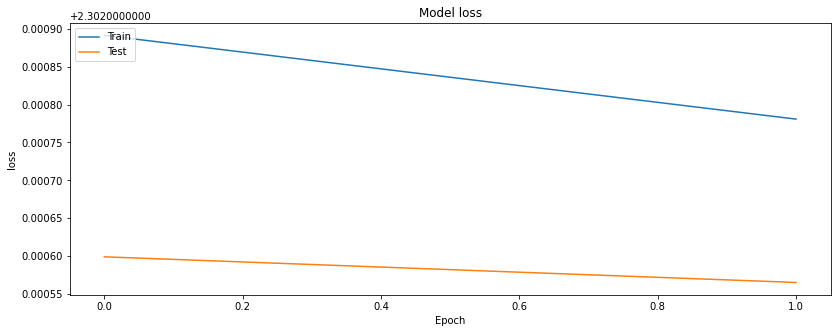

In [55]:
# Plot training & validation iou_score values
import matplotlib.pyplot as plt
his = pd.read_csv('model3/history.csv')

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

> <b> From the above plot we can ensure that model is not overfitted</b>

### 4. Data augmentation with spectogram data

1. use convert_to_spectrogram and convert the padded data from train and test data to spectogram data.
2. The shape of train data will be 14400 x 64 x 35 and shape of test_data will be 400 x 64 x35
3. Define the model similar to model 2 and fit the data

In [99]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [117]:
X_train_spectrogram = np.array(convert_to_spectrogram(X_train_pad_seq))
X_test_spectrogram = np.array(convert_to_spectrogram(X_test_pad_seq))


print(X_train_spectrogram.shape)
print(X_test_spectrogram.shape)

(14400, 64, 35)
(400, 64, 35)


In [118]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above

tf.keras.backend.clear_session()

input_layer = Input(shape=(64, 35), name="X_train_pad_seq_input", dtype='float32')

lstm_output = LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.HeUniform())(input_layer)

global_pooling = GlobalAveragePooling1D()(lstm_output)

fc1 = Dense(128, kernel_initializer=tf.keras.initializers.HeUniform())(global_pooling)

gelu_1 = tf.keras.layers.PReLU()(fc1)

droup_1 = Dropout(0.2)(gelu_1)

output = Dense(10,activation='softmax')(droup_1)

model4 = Model(inputs = [input_layer], outputs = output) 

model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 X_train_pad_seq_input (Inpu  [(None, 64, 35)]         0         
 tLayer)                                                         
                                                                 
 lstm (LSTM)                 (None, 64, 128)           83968     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 p_re_lu (PReLU)             (None, 128)               128       
                                                                 
 dropout (Dropout)           (None, 128)               0     

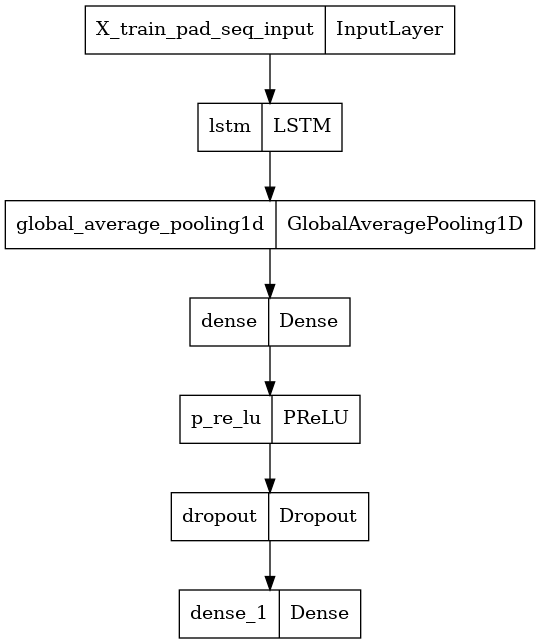

In [119]:
tf.keras.utils.plot_model(model4, to_file='model4/model4.png')

In [120]:
X_test_spectrogram.shape

(400, 64, 35)

In [121]:
y_test_int.shape

(400,)

In [129]:
X_train_spectrogram.shape

(14400, 64, 35)

In [126]:
y_train_augmented.shape

(14400,)

In [122]:
THRESHOLD = 0.8
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.x_test = validation_data[0]
        self.y_test = validation_data[1]
        
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.x_test)))
        val_label = np.argmax(val_predict, axis = 1)
        val_targ = self.y_test
        val_f1 = f1_score(val_targ, val_label, average='micro')
        print("val_F1_score: ", val_f1)
        
        
        if(val_f1 > 0.80):
            print("\nReached %2.2f%% val_F1_score, so stopping training!!" %(THRESHOLD))
            self.model.stop_training = True
        
        
metrics = Metrics(validation_data=([X_test_spectrogram], y_test_int))

In [123]:
tensorboard4 = TensorBoard(log_dir='model4/model4_logs'.format(time()), histogram_freq=1, write_graph=True,)

2022-09-03 14:00:31.092361: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-03 14:00:31.092401: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-03 14:00:31.095870: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-09-03 14:00:31.095890: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2022-09-03 14:00:31.095895: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-09-03 14:00:31.095900: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1716] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2022-09-03 14:00:31.095950: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-09-03 14:00:31.0

In [124]:
callbacks4 = [
    ModelCheckpoint(filepath='./model4/best_model_4.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_accuracy', verbose = 1),
    tf.keras.callbacks.CSVLogger('./model4/history.csv'),
]

#compile model.
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0006),
              metrics=['accuracy'])


In [130]:
#train your model

model4.fit([X_train_spectrogram],y_train_augmented, batch_size=64, epochs=3000, 
           validation_data=([X_test_spectrogram], y_test_int), callbacks=[callbacks4, metrics, tensorboard4],
          )

Epoch 1/3000
  1/225 [..............................] - ETA: 4:39 - loss: 2.5051 - accuracy: 0.0625

2022-09-03 14:07:22.437954: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-03 14:07:22.437983: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-03 14:07:22.438105: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-09-03 14:07:22.438115: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2022-09-03 14:07:22.438120: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-09-03 14:07:22.438124: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1716] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2022-09-03 14:07:22.554106: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-03 14:07

  4/225 [..............................] - ETA: 27s - loss: 2.5233 - accuracy: 0.0781

2022-09-03 14:07:22.644273: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to model4/model4_logs/train/plugins/profile/2022_09_03_14_07_22/AI-iiitg.trace.json.gz
2022-09-03 14:07:22.686045: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: model4/model4_logs/train/plugins/profile/2022_09_03_14_07_22

2022-09-03 14:07:22.691480: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to model4/model4_logs/train/plugins/profile/2022_09_03_14_07_22/AI-iiitg.memory_profile.json.gz
2022-09-03 14:07:22.692014: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: model4/model4_logs/train/plugins/profile/2022_09_03_14_07_22
Dumped tool data for xplane.pb to model4/model4_logs/train/plugins/profile/2022_09_03_14_07_22/AI-iiitg.xplane.pb
Dumped tool data for overview_page.pb to model4/model4_logs/train/plugins/profile/2022_09_03_1

225/225 [==============================] - ETA: 0s - loss: 2.1742 - accuracy: 0.1992
Epoch 1: val_accuracy improved from -inf to 0.30500, saving model to ./model4/best_model_4.h5
13/13 [==============================] - 0s 16ms/step
val_F1_score:  0.305
225/225 [==============================] - 14s 56ms/step - loss: 2.1742 - accuracy: 0.1992 - val_loss: 2.0058 - val_accuracy: 0.3050
Epoch 2/3000
224/225 [============================>.] - ETA: 0s - loss: 1.9218 - accuracy: 0.3292
Epoch 2: val_accuracy improved from 0.30500 to 0.42250, saving model to ./model4/best_model_4.h5
13/13 [==============================] - 0s 15ms/step
val_F1_score:  0.4225
225/225 [==============================] - 12s 54ms/step - loss: 1.9215 - accuracy: 0.3293 - val_loss: 1.8040 - val_accuracy: 0.4225
Epoch 3/3000
225/225 [==============================] - ETA: 0s - loss: 1.7148 - accuracy: 0.4094
Epoch 3: val_accuracy improved from 0.42250 to 0.51750, saving model to ./model4/best_model_4.h5
13/13 [=======

> <b>At end of 34 epoch val_F1_score 0.80</b>

In [131]:
%tensorboard --logdir model4/model4_logs

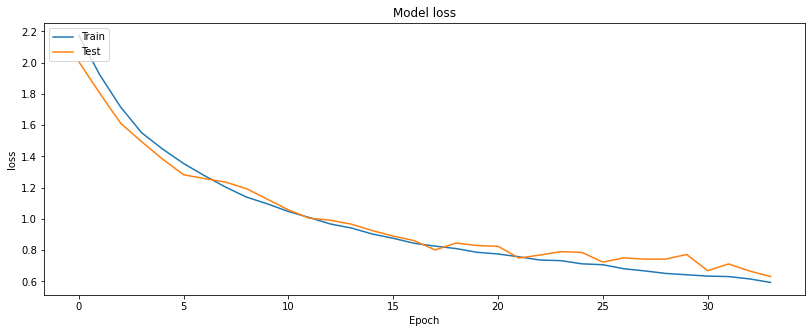

In [132]:
# Plot training & validation iou_score values
import matplotlib.pyplot as plt
his = pd.read_csv('model4/history.csv')

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

> <b> From the above plot we can ensure that model is not getting overfit</b>